In [1]:
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats
import pandas as pd
import pymc3 as pm
import theano.tensor as tt

In [2]:
df = pd.read_csv("./marketing_promo.csv")

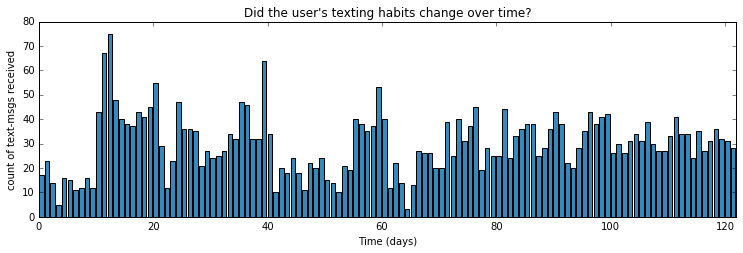

In [3]:
figsize(12.5, 3.5)
# count_data = np.loadtxt("data/txtdata.csv")
count_data = df.orders
# count_data = df.visits
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

In [4]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [5]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [6]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)
#     observation = pm.Exponential("obs", lambda_, observed=count_data)

In [7]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:01<00:00, 5745.79it/s]


In [8]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [9]:
lambda_vals = np.hstack([lambda_1_samples, lambda_2_samples])

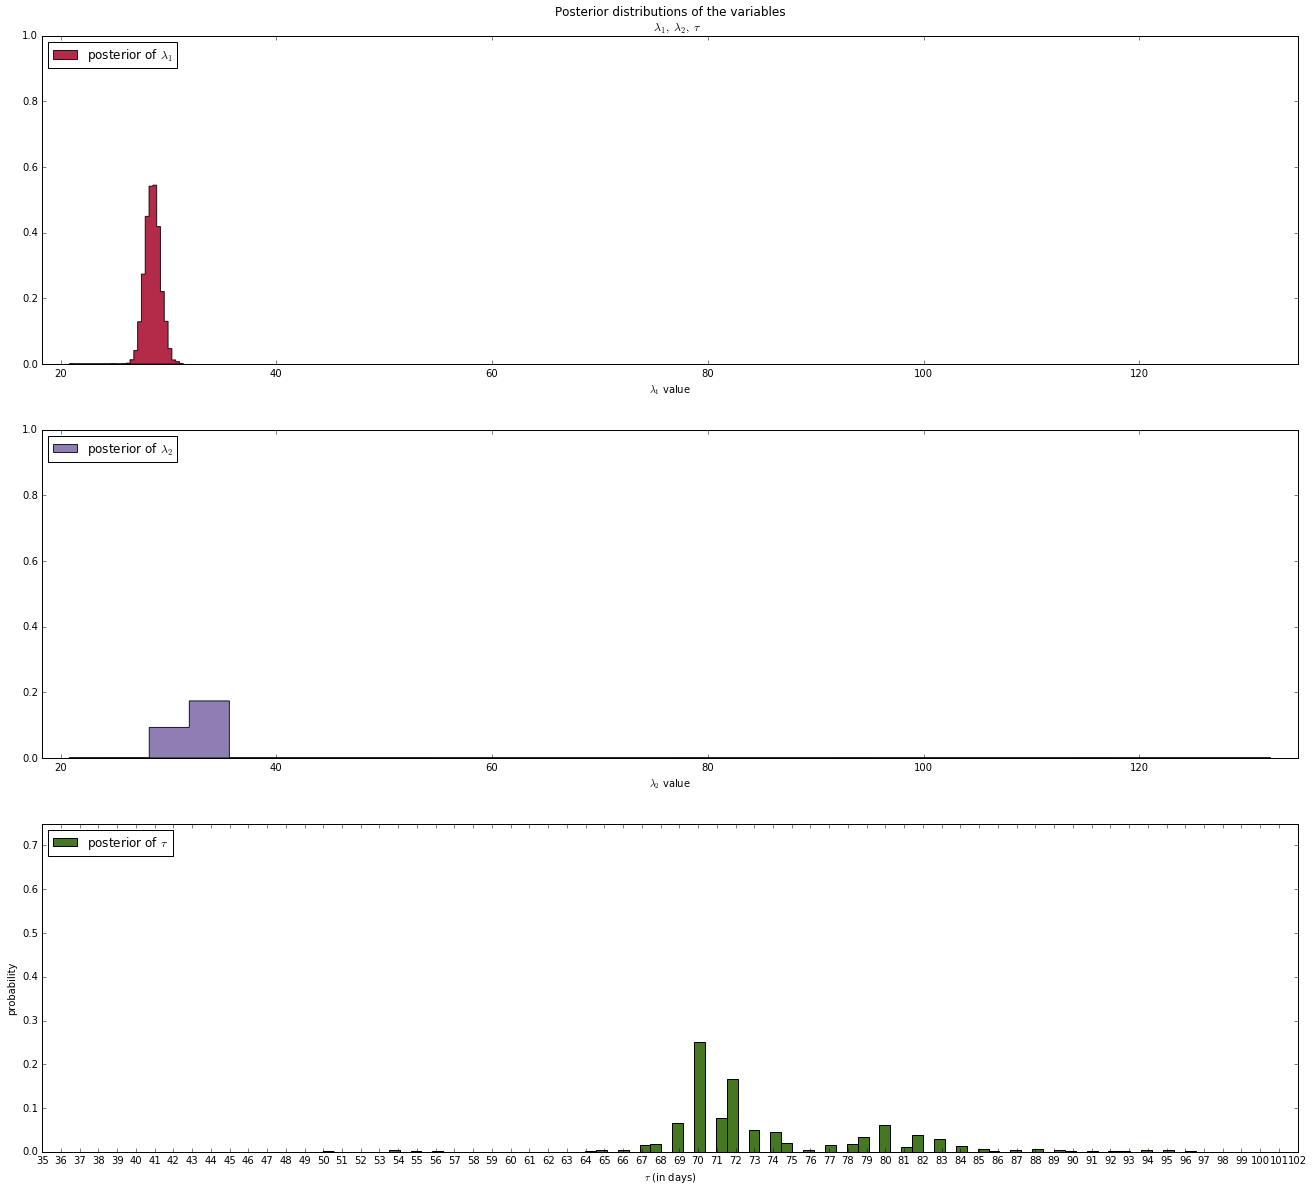

In [10]:
figsize(22.5, 20)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([min(lambda_vals)-2.5, max(lambda_vals)+2.5])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([min(lambda_vals)-2.5, max(lambda_vals)+2.5])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

## Lets get a goodness of fit estimate

We would like to get a feel for how appropriate our model is and the quality of the fit. We take the advice of Cam and do so graphically by simulating many instance of artifical data

In [11]:
simulated_data = pm.Bernoulli("simulation_data", p)

NameError: name 'p' is not defined

In [ ]:
def plot_artificial_dataset():
    tau = stats.randint.rvs(0, n_count_data)
    alpha = 1./20.
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=n_count_data - tau)]
    plt.bar(np.arange(n_count_data), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behaviour changed")
    plt.xlim(0, n_count_data);

In [ ]:
figsize(12.5, 5)
plt.title("More example of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_dataset()

In [ ]:
N=10000
with pm.Model() as model:
    alpha = 1.0/count_data.mean()
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    simulated = pm.Poisson("sims", lambda_)
    step = pm.Metropolis(vars=[lambda_])
    trace = pm.sample(N, tune=5000,step=step)

In [ ]:
simulated

In [ ]:
figsize(12.5, 5)

simulations = trace["tau"]
print(simulations.shape)

plt.title("Simulated dataset using posterior parameters")
figsize(12.5, 6)
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    plt.scatter(temperature, simulations[1000*i, :], color="k",
                s=50, alpha=0.6)
    plt.subplot(4, 1, i+1)
    plt.bar(np.arange(n_count_data), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behaviour changed")
    plt.xlim(0, n_count_data);

### Look at a similar thing with visit data

In [ ]:
figsize(12.5, 3.5)
# count_data = np.loadtxt("data/txtdata.csv")
# count_data = df.orders
count_data = df.visits
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

In [ ]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [ ]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [ ]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)
#     observation = pm.Exponential("obs", lambda_, observed=count_data)

In [ ]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

In [ ]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [ ]:
tau_samples

In [ ]:
lambda_vals = np.hstack([lambda_1_samples, lambda_2_samples])

In [ ]:
max(lambda_vals)

In [ ]:
figsize(22.5, 20)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([min(lambda_vals)-2.5, max(lambda_vals)+2.5])
plt.xlabel("$\lambda_1$ value")
plt.ylim([0, .25])

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([min(lambda_vals)-2.5, max(lambda_vals)+2.5])
plt.xlabel("$\lambda_2$ value")
plt.ylim([0, .25])

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

## What if we applied a similar model but used conversion?

Arguabley the "free shipping" promotion might only impact the number of customer who decide to actually buy a product once they arrive at the store and not the absolute number of vistors. We can try to build a different model by normalising orders by number of vistors

In [ ]:
conversion_data = df.orders/df.visits

In [ ]:
figsize(12.5, 3.5)
n_data = len(conversion_data)
plt.bar(np.arange(n_data), conversion_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("Proportion of visits converted to sales")
plt.title("Conversions")
plt.xlim(0, n_data);

To do this we develop a slightly different Bayesian model,

I'm going to assume that there are two time periods and that in each time period the sales conversion of a day can be estimated as a Normal distribution with some parameters $\mu$ and $\tau$). This seems reasonable (why? continuous data, no reason to think conversion would follow a non-normal distribution, True? maybe weekday, weekend effects?)

In [ ]:
# with pm.Model() as model:
#     alpha = 1.0/count_data.mean()  # Recall count_data is the
#                                    # variable that holds our txt counts
#     lambda_1 = pm.Exponential("lambda_1", alpha)
#     lambda_2 = pm.Exponential("lambda_2", alpha)
    
#     tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [ ]:
conversion_data.mean()

In [ ]:
# #notice the`value` here. We explain why below.
# with pm.Model() as model:
#     beta1 = pm.Normal("beta1", mu=0, tau=0.001, testval=0)
#     alpha1 = pm.Normal("alpha1", mu=0, tau=0.001, testval=0)
    
#     beta2 = pm.Normal("beta2", mu=0, tau=0.001, testval=0)
#     alpha2 = pm.Normal("alpha2", mu=0, tau=0.001, testval=0)
    
#     tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)
    
    
basic_model = pm.Model()

# with basic_model:
#     mu1 = pm.Normal('mu1', mu=conversion_data.mean(), sd=conversion_data.std())
#     mu2 = pm.Normal('mu2', mu=conversion_data.mean(), sd=conversion_data.std())
#     sigma1 = pm.HalfNormal('sigma1', sd=conversion_data.std())
#     sigma2 = pm.HalfNormal('sigma2', sd=conversion_data.std())
    
#     tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)

with basic_model:
    alpha1 = pm.Normal('alpha1', sd=0.05)
    alpha2 = pm.Normal('alpha2', sd=0.05)
    beta1 = pm.HalfNormal('beta1', sd=0.05)
    beta2 = pm.HalfNormal('beta2', sd=0.05)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)

In [ ]:
with basic_model:
    idx = np.arange(n_data) # Index
#     tau_mu = pm.math.switch(tau >= idx, mu1, mu2)
#     tau_sigma = pm.math.switch(tau >= idx, sigma1, sigma2)
    tau_alpha = pm.math.switch(tau >= idx, alpha1, alpha2)
    tau_beta = pm.math.switch(tau >= idx, beta1, beta2)

In [ ]:
with basic_model:
#     observation = pm.HalfNormal("obs", mu=tau_mu, sd=tau_sigma, observed=conversion_data)
    observation = pm.Gamma("obs", alpha=tau_alpha, beta=tau_beta, observed=conversion_data)

In [ ]:
### Mysterious code to be explained in Chapter 3.
with basic_model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

In [ ]:
# # mu1_samples = trace['mu1']
# sigma1_samples = trace['sigma1']
# # mu2_samples = trace['mu2']
# sigma2_samples = trace['sigma2']
# tau_samples = trace['tau']

alpha1_samples = trace['alpha1']
beta1_samples = trace['beta1']
alpha2_samples = trace['alpha2']
beta2_samples = trace['beta2']
tau_samples = trace['tau']

In [ ]:
# mu_vals = np.hstack([mu1_samples, mu2_samples])
# sigma_vals = np.hstack([sigma1_samples, sigma2_samples])

alpha_vals = np.hstack([alpha1_samples, alpha2_samples])
beta_vals = np.hstack([beta1_samples, beta2_samples])

In [ ]:
plt.plot(beta1_samples)

In [ ]:
plt.hist(alpha1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
# plt.xlim([min(sigma_vals)-sigma_vals.std(), max(sigma_vals)+sigma_vals.std()])
plt.xlabel("$\lambda_1$ value")

In [ ]:
plt.hist(alpha2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([min(sigma_vals)-sigma_vals.std(), max(sigma_vals)+sigma_vals.std()])
plt.xlabel("$\lambda_1$ value")

In [ ]:
figsize(22.5, 20)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(sigma1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([min(sigma_vals)-sigma_vals.std(), max(sigma_vals)+sigma_vals.std()])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(sigma1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([min(mu_vals)-mu_vals.std(), max(mu_vals)+mu_vals.std()])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_data))

plt.legend(loc="upper left")
# plt.ylim([0, .75])
plt.xlim([35, len(conversion_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");